# Lab 6.4 - Working with APIs

In [127]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from pandas.io.json import json_normalize
import getpass

## 1. Federal Reserve Economic Data (FRED)

In [36]:
FRED_API_KEY = getpass.getpass()

In [131]:
# First trying this manually...I only got a line of metadata with the endpoint I found

response_fred = requests.get('https://api.stlouisfed.org/fred/category?category_id=125&api_key='+ FRED_API_KEY + "&file_type=json")
results_fred = response_fred.json()
results_fred

{'categories': [{'id': 125, 'name': 'Trade Balance', 'parent_id': 13}]}

In [121]:
data_fred = pd.DataFrame(response_fred.json())

In [124]:
dict(data_fred['categories'])
pd.DataFrame(dict(data_fred['categories']))
pd.DataFrame(dict(data_fred['categories'])).transpose()

,id,name,parent_id
0,125,Trade Balance,13


In [ ]:
# Using a third-party API wrapper from GitHub because the FRED api documentation is utter SHITE
# !pip install full-fred

In [107]:
from full_fred.fred import Fred

In [111]:
fred = Fred('FRED_API_KEY.txt')

fred.set_api_key_file('FRED_API_KEY.txt')

True

In [113]:
data_fred = fred.get_series_df('GDPPOT')
data_fred.head()

,realtime_start,realtime_end,date,value
0,2022-10-11,2022-10-11,1949-01-01,2104.0506049138817
1,2022-10-11,2022-10-11,1949-04-01,2131.6486926425077
2,2022-10-11,2022-10-11,1949-07-01,2160.479542925909
3,2022-10-11,2022-10-11,1949-10-01,2188.028985512548
4,2022-10-11,2022-10-11,1950-01-01,2217.26007703257


In [114]:
data_fred["date"] = data_fred["date"].astype("datetime64")
data_fred = data_fred.set_index("date")
data_fred

,realtime_start,realtime_end,value
date,,,
1949-01-01,2022-10-11,2022-10-11,2104.0506049138817
1949-04-01,2022-10-11,2022-10-11,2131.6486926425077
1949-07-01,2022-10-11,2022-10-11,2160.479542925909
1949-10-01,2022-10-11,2022-10-11,2188.028985512548
1950-01-01,2022-10-11,2022-10-11,2217.26007703257
1950-04-01,2022-10-11,2022-10-11,2246.729184353688
1950-07-01,2022-10-11,2022-10-11,2276.368880167725
1950-10-01,2022-10-11,2022-10-11,2307.3660523481108
1951-01-01,2022-10-11,2022-10-11,2338.824974317999


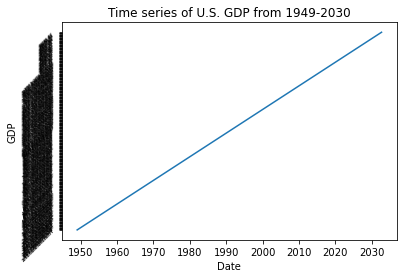

<Figure size 864x720 with 0 Axes>

In [115]:
# Here is a very crude/rudimentary example of a visualisation using data sourced from the api query:

plt.plot(data_fred['value'])
plt.xlabel("Date")
plt.ylabel("GDP")
plt.title("Time series of U.S. GDP from 1949-2030")
plt.tick_params(axis='y',labelsize=4,rotation=45)
plt.figure(figsize=(12,10))

plt.show()

In [201]:
# Testing another example for "Real Gross National Product"

data_fred_gdp = fred.get_series_df('GNPCA')
data_fred_gdp.head()

,realtime_start,realtime_end,date,value
0,2022-10-11,2022-10-11,1929-01-01,1120.718
1,2022-10-11,2022-10-11,1930-01-01,1025.678
2,2022-10-11,2022-10-11,1931-01-01,958.927
3,2022-10-11,2022-10-11,1932-01-01,834.769
4,2022-10-11,2022-10-11,1933-01-01,823.628


## 2. Etherscan

In [ ]:
# Again, I had to download a third-party API wrapper from GitHub to make this work...
# !pip install etherscan-python

etherscan_api_key = getpass.getpass()

In [61]:
from etherscan import Etherscan
eth = Etherscan(etherscan_api_key)

In [63]:
# The endpoints for the free API are extremely limited... I could not make a df with anything available...

eth.get_total_eth_supply()

'122748417499000000000000000'

In [150]:
# I also tried to do it manually (without the third-party wrapper) with a time series endpoint:

response_etherscan = requests.get('https://api.etherscan.io/api?module=stats&action=chainsize&startdate=2020-01-01&enddate=2022-01-01&clienttype=geth&syncmode=default&sort=asc&apikey=' + etherscan_api_key)

In [ ]:
# Read the json into python

results_etherscan = response_etherscan.json()
results_etherscan

In [174]:
# We still need to clean up the dictionary embedded in the result column

df_etherscan_results = pd.DataFrame(results_etherscan)
df_etherscan_results

,status,message,result
0,1,OK,"{'blockNumber': '9193298', 'chainTimeStamp': '..."
1,1,OK,"{'blockNumber': '9198286', 'chainTimeStamp': '..."
2,1,OK,"{'blockNumber': '9203965', 'chainTimeStamp': '..."
3,1,OK,"{'blockNumber': '9210487', 'chainTimeStamp': '..."
4,1,OK,"{'blockNumber': '9217066', 'chainTimeStamp': '..."
5,1,OK,"{'blockNumber': '9223546', 'chainTimeStamp': '..."
6,1,OK,"{'blockNumber': '9230133', 'chainTimeStamp': '..."
7,1,OK,"{'blockNumber': '9236669', 'chainTimeStamp': '..."
8,1,OK,"{'blockNumber': '9243315', 'chainTimeStamp': '..."
...,...,...,...


In [ ]:
# Checking how many values are in the dictionary in the 'result' column (curious)

df_etherscan_results['result'].value_counts()

In [178]:
# Final output: a time-series of ethereum node data from 01-01-2020 to 01-01-2022

dict(df_etherscan_results['result'])
data_etherscan_nodes = pd.DataFrame(dict(df_etherscan_results['result'])).transpose()

data_etherscan_nodes

,blockNumber,chainTimeStamp,chainSize,clientType,syncMode
0,9193298,2020-01-01,252353240822,Geth,Default
1,9198286,2020-01-02,252466600488,Geth,Default
2,9203965,2020-01-03,252599127438,Geth,Default
3,9210487,2020-01-04,252775007323,Geth,Default
4,9217066,2020-01-05,254285525472,Geth,Default
5,9223546,2020-01-06,257614536764,Geth,Default
6,9230133,2020-01-07,257786294467,Geth,Default
7,9236669,2020-01-08,257938241681,Geth,Default
8,9243315,2020-01-09,257972269449,Geth,Default
...,...,...,...,...,...


## 3. Social media stock sentiment analysis (WallStreetBets x Reddit)



In [ ]:
response_wsb = requests.get('https://tradestie.com/api/v1/apps/reddit')
results_wsb = response_wsb.json()
results_wsb

In [139]:
# This was easy - no manipulation necessary. Straight to a df when asked...

data_wsb = pd.DataFrame(results_wsb)
data_wsb

,no_of_comments,sentiment,sentiment_score,ticker
0,42,Bearish,-0.392,BBBY
1,22,Bullish,0.130,GME
2,20,Bullish,0.257,TSLA
3,13,Bullish,0.026,UK
4,12,Bullish,0.190,AMD
5,9,Bullish,0.020,GM
6,7,Bullish,0.151,TA
7,5,Bearish,0.000,TQQQ
8,5,Bearish,-0.109,NVDA
...,...,...,...,...


In [ ]:
# Testing the api for a specific date (2022-01-01)
# I could loop this request and concatenate the outputs to make a time series dataset

response_ts = requests.get('https://tradestie.com/api/v1/apps/reddit?date=2022-01-01')
results_ts = response_ts.json()
results_ts

In [141]:
data_wsb_ts = pd.DataFrame(results_ts)
data_wsb_ts

,no_of_comments,sentiment,sentiment_score,ticker
0,38,Bullish,0.130,GME
1,29,Bullish,0.257,TSLA
2,21,Bullish,0.159,AMC
3,15,Bearish,-0.147,IRS
4,13,Bullish,0.670,WISH
5,10,Bullish,0.371,BABA
6,9,Bullish,0.227,EV
7,8,Bullish,0.220,PLTR
8,7,Bullish,0.191,RBLX
...,...,...,...,...
